Problem 2 Statement:
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at
the following speeches of the Presidents of the United States of America:President Franklin D. Roosevelt in 1941,
President John F. Kennedy in 1961, President Richard Nixon in 1973

Approach:
We are going to analyse the Presidents inaugural speech of President Franklin D. Roosevelt in 1941, President John F.
Kennedy in 1961, President Richard Nixon in 1973 and apply text analytics on the speech to find the structure of the
speech, stopwords in the speech and most frequent words used. We would also form wordclouds of the speech.

In [35]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [36]:
import nltk
nltk.download('inaugural')
nltk.download('punkt')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\ankitsharma04\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankitsharma04\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Number of Characters in each file 

In [37]:
number_of_characters = len(Roosevelt)
print('\n Number of charaters in Roosevelt file :',number_of_characters)
number_of_characters_k = len(Kennedy)
print('\n Number of charaters in Kennedy file :',number_of_characters_k)
number_of_characters_n = len(Nixon)
print('\n Number of charaters in Nixon file :',number_of_characters_n)



 Number of charaters in Roosevelt file : 7571

 Number of charaters in Kennedy file : 7618

 Number of charaters in Nixon file : 9991


### Number of words in each text file:

In [38]:
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize

In [39]:
from nltk.tokenize import sent_tokenize

In [40]:
# Number of words in Kennedy
x= inaugural.raw('1961-Kennedy.txt')
words = x.split()
print('Number of words in Kennedy file:',len(words))

Number of words in Kennedy file: 1390


In [41]:
# Number of words in Nixon
x= inaugural.raw('1973-Nixon.txt')
words = x.split()
print('Number of words in Nixon file:',len(words))

Number of words in Nixon file: 1819


In [42]:
# Number of words in Roosevelt
x= inaugural.raw('1941-Roosevelt.txt')
words = x.split()
print('Number of words in Roosevelt file:',len(words))

Number of words in Roosevelt file: 1360


### Number of Sentences.

In [43]:
# Number of sentences in Kennedy
K = sent_tokenize(Kennedy)
print(len(K))

52


In [44]:
# Number of sentences in Nixon
R = sent_tokenize(Roosevelt)
print(len(R))

68


In [45]:
# Number of sentences in Roosevelt
N = sent_tokenize(Nixon)
print(len(N))

68


In [46]:
# Number of sentences in Kennedy
#y1 = pd.DataFrame({'Text':inaugural.raw('1961-Kennedy.txt')},index=[0])
#y1['sentences'] = y1['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
#y1

In [47]:
# Number of sentences in Nixon
#y2 = pd.DataFrame({'Text':inaugural.raw('1973-Nixon.txt')},index=[0])
#y2['sentences'] = y2['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
#y2

In [48]:
# Number of sentences in Roosevelt
#y3 = pd.DataFrame({'Text':inaugural.raw('1941-Roosevelt.txt')},index=[0])
#y3['sentences'] = y3['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
#y3

### 2.2 Remove all the stop words from all the three speeches.

In [49]:
from nltk.corpus import stopwords

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankitsharma04\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
#stop = stopwords.words('english')
#stop.sort()
#stop[0:5]

In [59]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(Kennedy)
stopwords_x = [w for w in word_tokens if w in stop_words]
len(stopwords_x)

639

In [60]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(Roosevelt)
stopwords_x = [w for w in word_tokens if w in stop_words]
len(stopwords_x)

655

In [61]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(Nixon)
stopwords_x = [w for w in word_tokens if w in stop_words]
len(stopwords_x)

912

In [62]:
# Remove all the stopwords from Kennedy's speeach
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(Kennedy)
filtered_sentence_Kennedy = [w for w in word_tokens if not w in stop_words]
filtered_sentence_Kennedy = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence_Kennedy.append(w)
print(word_tokens)
print(filtered_sentence_Kennedy)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revolutionary', 

In [63]:
# Remove all the stopwords from Nixon's speeach
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(Nixon)
filtered_sentence_Nixon = [w for w in word_tokens if not w in stop_words]
filtered_sentence_Nixon = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence_Nixon.append(w)
print(word_tokens)
print(filtered_sentence_Nixon)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that'

In [64]:
# Remove all the stopwords from Roosevelt's speeach
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(Roosevelt)
filtered_sentence_Roosevelt = [w for w in word_tokens if not w in stop_words]
filtered_sentence_Roosevelt = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence_Roosevelt.append(w)
print(word_tokens)
print(filtered_sentence_Roosevelt)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.',

### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [65]:
# Top 3 words from Kennedy's speech
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

In [66]:
tokenizer = RegexpTokenizer(r'\w+')
Kennedy_no_punc = tokenizer.tokenize(Kennedy)
set(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Let', 16),
 ('Us', 12),
 ('World', 8),
 ('Sides', 8),
 ('New', 7),
 ('Pledge', 7),
 ('Citizens', 5),
 ('Power', 5),
 ('Shall', 5),
 ('Free', 5),
 ('Nations', 5),
 ('Ask', 5),
 ('President', 4),
 ('Fellow', 4),
 ('Freedom', 4),
 ('First', 4),
 ('Americans', 4),
 ('Peace', 4),
 ('Always', 4),
 ('Cannot', 4),
 ('Hope', 4),
 ('Help', 4),
 ('Arms', 4),
 ('Country', 4),
 ('Call', 4),
 ('Today', 3),
 ('Well', 3),
 ('God', 3),
 ('Human', 3),
 ('Poverty', 3),
 ('Life', 3),
 ('Globe', 3),
 ('Dare', 3),
 ('Go', 3),
 ('Generation', 3),
 ('Know', 3),
 ('Bear', 3),
 ('Control', 3),
 ('May', 3),
 ('Good', 3),
 ('Join', 3),
 ('Begin', 3),
 ('Never', 3),
 ('Final', 3),
 ('Vice', 2),
 ('Mr', 2),
 ('Forebears', 2),
 ('Century', 2),
 ('Hands', 2),
 ('Forms', 2),
 ('Yet', 2),
 ('Around', 2),
 ('Rights', 2),
 ('Hand', 2),
 ('Revolution', 2),
 ('Word', 2),
 ('Forth', 2),
 ('Time', 2),
 ('Friend', 2),
 ('Foe', 2),
 ('Passed', 2),
 ('Nation', 2),
 ('Committed', 2),
 ('Every', 2),
 ('Whether', 2),
 ('Burden'

In [67]:
# Top 3 words from Nixon's speech
tokenizer = RegexpTokenizer(r'\w+')
Kennedy_no_punc = tokenizer.tokenize(Nixon)
set(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Us', 26),
 ('Let', 22),
 ('America', 21),
 ('Peace', 19),
 ('World', 18),
 ('New', 15),
 ('Nation', 11),
 ('Responsibility', 11),
 ('Government', 10),
 ('Great', 9),
 ('Home', 9),
 ('Abroad', 8),
 ('Together', 7),
 ('Years', 7),
 ('Shall', 7),
 ('Policies', 7),
 ('Role', 7),
 ('Make', 7),
 ('Every', 7),
 ('History', 7),
 ('Better', 7),
 ('Time', 6),
 ('Right', 6),
 ('People', 6),
 ('Help', 6),
 ('Four', 5),
 ('Today', 5),
 ('Responsibilities', 5),
 ('Progress', 5),
 ('Respect', 5),
 ('Others', 5),
 ('Act', 5),
 ('Promise', 4),
 ('Long', 4),
 ('Work', 4),
 ('Freedom', 4),
 ('God', 4),
 ('Old', 4),
 ('Proud', 4),
 ('Faith', 4),
 ('Mr', 3),
 ('Country', 3),
 ('Share', 3),
 ('Resolve', 3),
 ('Retreat', 3),
 ('Greatly', 3),
 ('Century', 3),
 ('Nations', 3),
 ('Bold', 3),
 ('Another', 3),
 ('Future', 3),
 ('Forward', 3),
 ('Build', 3),
 ('Structure', 3),
 ('Live', 3),
 ('System', 3),
 ('Gladly', 3),
 ('Challenges', 3),
 ('Away', 3),
 ('Way', 3),
 ('Individual', 3),
 ('Ask', 3),
 ('Ashamed

In [68]:
# Top 3 words from Roosevelt's speech
tokenizer = RegexpTokenizer(r'\w+')
Kennedy_no_punc = tokenizer.tokenize(Roosevelt)
set(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Nation', 12),
 ('Know', 10),
 ('Spirit', 9),
 ('Life', 9),
 ('Democracy', 9),
 ('Us', 8),
 ('People', 7),
 ('America', 7),
 ('Years', 6),
 ('Freedom', 6),
 ('Human', 5),
 ('New', 5),
 ('Body', 5),
 ('Mind', 5),
 ('Speaks', 5),
 ('Day', 4),
 ('States', 4),
 ('Government', 4),
 ('Must', 4),
 ('Something', 4),
 ('Faith', 4),
 ('United', 3),
 ('Task', 3),
 ('Within', 3),
 ('History', 3),
 ('Nations', 3),
 ('Three', 3),
 ('Live', 3),
 ('Future', 3),
 ('Free', 3),
 ('Alone', 3),
 ('Still', 3),
 ('Every', 3),
 ('Continent', 3),
 ('Like', 3),
 ('Person', 3),
 ('World', 3),
 ('Sacred', 3),
 ('Came', 3),
 ('First', 3),
 ('Destiny', 3),
 ('National', 2),
 ('1789', 2),
 ('Sense', 2),
 ('Washington', 2),
 ('Create', 2),
 ('Together', 2),
 ('Disruption', 2),
 ('Without', 2),
 ('Time', 2),
 ('Midst', 2),
 ('Stock', 2),
 ('May', 2),
 ('Lives', 2),
 ('Little', 2),
 ('Measure', 2),
 ('Doubt', 2),
 ('Measured', 2),
 ('Americans', 2),
 ('True', 2),
 ('Republic', 2),
 ('Acted', 2),
 ('Security', 2),
 ('

### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [69]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [70]:
# Wordcloud for Document : Inaugural.raw('1961-Kennedy.txt')
# Word Cloud 
from wordcloud import WordCloud, STOPWORDS


In [71]:
import re

In [72]:
from PIL import Image

### Wordcloud for Kennedy

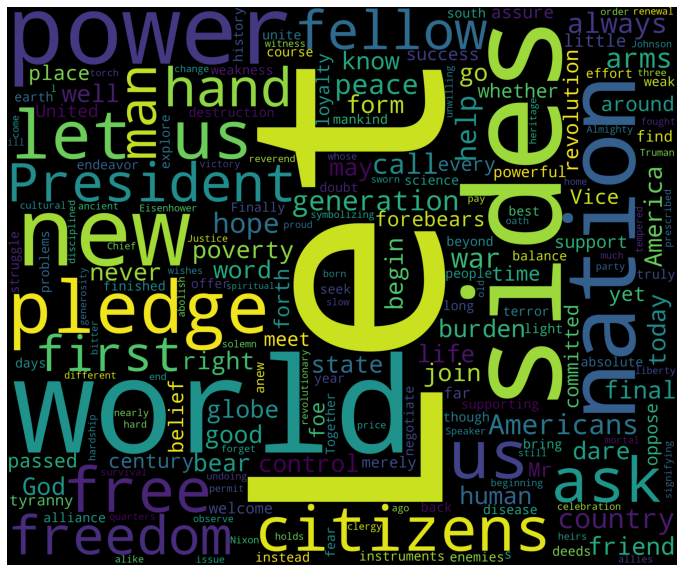

In [73]:
new_df_k = filtered_sentence_Kennedy
words_k =' '.join(new_df_k)
wordcloud_k = WordCloud(stopwords=STOPWORDS,
                     background_color='black',
                     width=3000,
                     height=2500).generate(words_k)
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud_k)
plt.axis('off')
plt.show()

### Wordcloud for Nixon

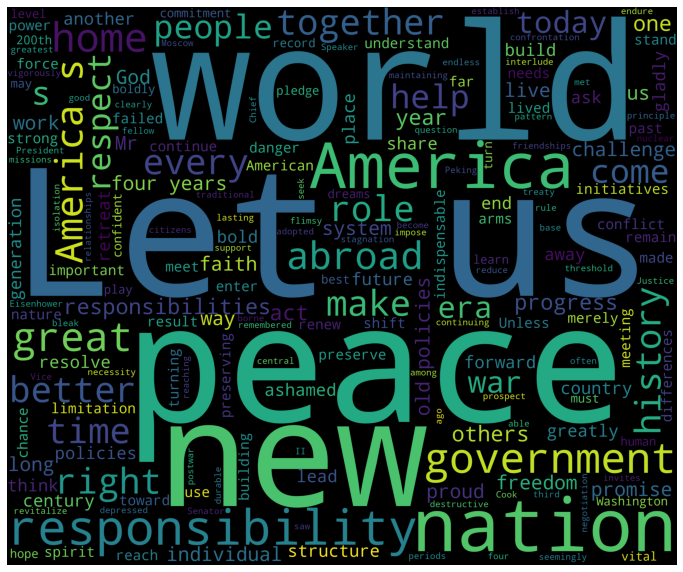

In [74]:
new_df_n = filtered_sentence_Nixon
words_n =' '.join(new_df_n)
wordcloud_n = WordCloud(stopwords=STOPWORDS,
                     background_color='black',
                     width=3000,
                     height=2500).generate(words_n)
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud_n)
plt.axis('off')
plt.show()

### Wordcloud for Roosevelt

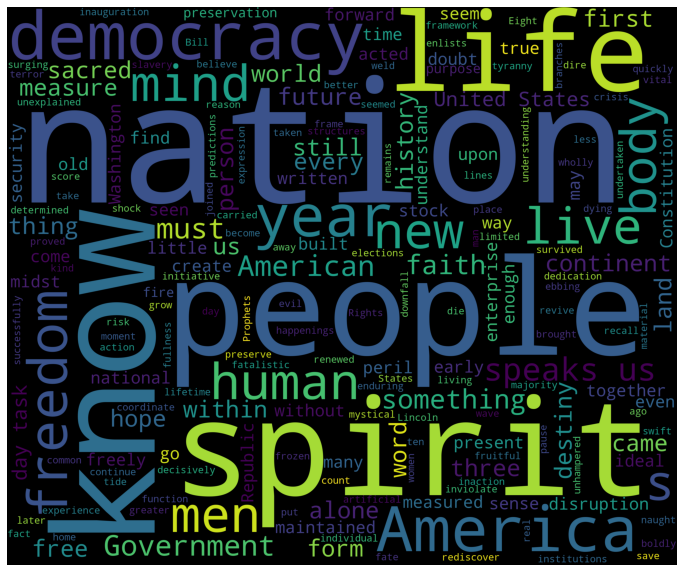

In [75]:
new_df_r = filtered_sentence_Roosevelt
words_r =' '.join(new_df_r)
wordcloud_r = WordCloud(stopwords=STOPWORDS,
                     background_color='black',
                     width=3000,
                     height=2500).generate(words_r)
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud_r)
plt.axis('off')
plt.show()